In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
%cd C:\Users\praga\Downloads\PRML\Assign1
df=pd.read_csv('Dataset.csv',header = None)

C:\Users\praga\Downloads\PRML\Assign1


In [4]:
X=df.to_numpy()

In [5]:
X=X.T#Taking transpose to get in dxn form

In [6]:
def PCA_eigen(X):#takes data, returns eigenvals and eigenvecs
    X=np.array(X)
    mu=np.mean(X,axis=1)
    means=np.array([mu for i in range(np.shape(X)[1])])
    Xd=X-means.T
    corr= np.matmul(Xd,Xd.T)
    corr=corr/np.shape(X[1])
    
    #_________________
    evals, evecs = np.linalg.eigh(corr)#gives eigen in ascending and normalized vectors
    idx = evals.argsort()[::-1]  #argsort just incase 
    evals = evals[idx]
    evecs = evecs[:,idx]
    #_________________
    
    return evals,evecs,Xd

In [7]:
eig=PCA_eigen(X)

In [8]:
eig#eigenvals, eigenvecs, X centred

(array([17.1319144 , 14.48960475]),
 array([[ 0.323516 , -0.9462227],
        [ 0.9462227,  0.323516 ]]),
 array([[ 0.14299959, -0.30467041,  0.46624959, ...,  6.10619959,
         -7.40940041, -0.12948041],
        [ 0.98492978,  0.98561978, -0.84003022, ..., -5.98640022,
         -5.52050022, -8.80360022]]))

In [9]:
eig[1][:,0]#first evec

array([0.323516 , 0.9462227])

In [10]:
eig[1][:,1]#second evec

array([-0.9462227,  0.323516 ])

In [11]:
a=np.matmul(eig[1][:,0],eig[2])
b=np.matmul(eig[1][:,1],eig[2])#to show eval= variance contribution

In [12]:
np.mean(np.square(a))

17.13191440244437

In [13]:
np.mean(np.square(b))

14.489604749330642

In [14]:
import matplotlib.pyplot as plt

In [15]:
X.shape

(2, 1000)

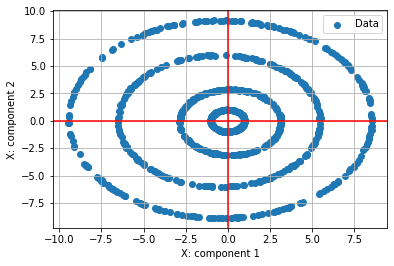

In [16]:
Xd=eig[2]#plotting graphs
xm,ym=np.mean(X,axis=1)
plt.scatter(X[0],X[1])
# plt.scatter(Xd[0],Xd[1])


plt.axvline(x=xm, color='r')
plt.axhline(y=ym, color='r')
# plt.axhline(y=0, color='k')
# plt.axvline(x=0, color='k')
plt.xlabel('X: component 1')
plt.ylabel('X: component 2')
plt.grid(True)
plt.legend(['Data'])
plt.show()


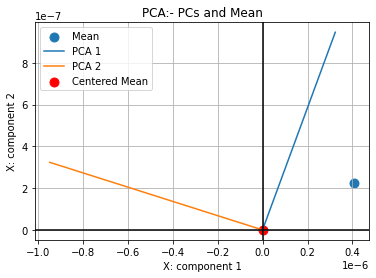

In [32]:
#plotting graphs of PCA with and without mean

plt.scatter(xm,ym,s=80)
w1=eig[1][:,0]/1000000
w2=eig[1][:,1]/1000000

plt.plot([0,w1[0]],[0,w1[1]])
plt.plot([0,w2[0]],[0,w2[1]])
plt.scatter([0],[0],c='r',s=80)

plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')

plt.xlabel('X: component 1')
plt.ylabel('X: component 2')
plt.legend(["Mean","PCA 1","PCA 2", "Centered Mean"])
plt.title('PCA:- PCs and Mean')
plt.grid(True)
plt.show()